# FAIRe Qualitäts-KPIs
Autor:  Tahsin Ahmad
Datum:  24.10.23

## Forschungsfrage
Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit: 
    
#### 1- Wie viel wiegt mein Fahrzeug?

#### 2- Aus wie vielen Teilen besteht mein Fahrzeug?

#### 3- Wie viel kostet das Fahrzeug?


## Erstes Fahrzeug


### Versuchsziel
Formulieren Sie ein Versuchsziel für diesen ersten Versuch:
#### Wie viel wiegt mein Fahrzeug?


### Versuchsaufbau

Bauen Sie ein erstes Fahrzeug aus den gegebenen LEGO-Teilen in der CAD-Software LeoCAD auf.

Hierbei gelten die folgenden Rahmenbedingungen:
- Das Fahrzeug muss aus Baugruppen, Bauteilen und Komponenten bestehen.
- Es muss mindestens vier Räder besitzen
- Es muss sich durch den elektrischen Antrieb fortbewegen können. 
- Die Verwendung eines Getriebes zwischen Motor und Antriebsachse(n) ist verpflichtend. 
- Die Farbe von mindestens einem Teil soll sich von der in LeoCAD hinterlegten Standardfarbe unterscheiden.
- Es sind nur die LEGO-Teile zu verwenden, welche sich in den JSON-Dateien bzw. in
der zur Verfügung gestellten Teilebibliothek befinden.

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu (*Hinweise: Ein Bild lässt sich mit \!\[Bildbeschreibung](/Pfad/zum/Bild) hinzufügen. Achten Sie darauf, das Bild später auch in Git hinzuzufügen*):


![Letgo car](figures/S2.png)

Beschreiben Sie kurz und präzise Ihr Fahrzeug:

#### Es handelt sich um ein Fahrzeug mit nur einem Motor.
#### Es hat vier Räder. Das Zahnrad am Motor hat 8 Zähne, das Zahnrad an der Antriebswelle hat 36 Zähne.
#### Die Farbe des Motors weicht von der Standardfarbe ab.

Bauen Sie das Fahrzeug nun in unserem Software-Framework zusammen. Instanziieren Sie die LEGO-Teile und lesen Sie dabei auch die Eigenschaften ein. Ergänzen Sie zusätzliche Eigenschaften, wie z.B. die Farbe. Referenzieren Sie die Teile aufeinander und erstellen Sie auf diese Weise sinnvolle Bauteile, Baugruppen und das
Gesamtsystem. Nutzen Sie die hierfür bereitgestellten Klassendefinitionen und Methoden. Achten Sie auf eine gute Code-Dokumentation. Sie können sich für die Bearbeitung an den zur Verfügung gestellten Code-Zellen orientieren, können hiervon jedoch auch abweichen.

*Hinweise: Achten Sie auf die Unterschiede zum Minimalbeispiel. Eine direkte Kopie ist nicht möglich. Achten Sie außerdem darauf, ein Teil (eindeutig identifiziert durch seine UUID) nicht an mehreren Stellen zu verbauen*

In [2]:
import json
import pprint
from functions import calculation_rules
from functions.classes import *

In [3]:
# initialize components

In [4]:
# Now i will intialize front and back axles
# Note !!! The Front if the car is, where the battery is located
# All four wheels are able to spin freely, only one of them is connected to the motor
# some of the relevant axles are located in frames.json not in axles.json
# i will open the the file location for the front axels
with open("datasheets/frame.json") as json_file:
    # loading the json files
    axles = json.load(json_file)  
# I will choose the part 3749, it will be use for both right front and left front axles.  
# front right axle
front_right_axle = LegoComponent("front right axle", axles["3749"])
# Now i will add the color of the front axle, which in my case is grey
front_right_axle.properties["color"] = "grey"
# I will now print the properties of the front right axle to see if the added property of color shows up in them !
# "print(front_right_axle.properties)" With this line of code the properties do show up but in a horizontal line 
# I will use the pprint to generate an output in a vertical line
pprint.pprint(front_right_axle.properties)
#_________________________________________________________________________________________________________
# since the front right axle ist the same as the front left axle, i will simply clone them
front_left_axle = front_right_axle.clone("front left axle")
# again printing the label to keep an overview in the output
# printing out the properties just to be sure ! and comparing them
pprint.pprint(front_left_axle.properties)
#_________________________________________________________________________________________________________
# The right back axel is also the same as front ones
# so once again i will clone it
back_right_axle = front_right_axle.clone("back right axle")
#____________________________________________________________________________________________________________
# The back left axel ist not the same as the other 3
# The back axel is located in axles.json
with open("datasheets/axles.json") as json_file:    
    #loading the file
    axles = json.load(json_file)   
# The chosen part ist 5 studs long
back_left_axle = LegoComponent("back left axel", axles["32073"])
# The color of this part is also grey
back_left_axle.properties["color"] = "grey"
pprint.pprint(back_left_axle.properties)    

{'category': 'frame',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3749&name=Technic,%20Axle%20%201L%20with%20Pin%20without%20Friction%20Ridges&category=%5BTechnic,%20Axle%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 5,
 'dimension [studs]': '0,75 x 2 x 0,55',
 'item description': 'Technic, Axle 1L with Pin without Friction Ridges',
 'item number': 3749,
 'label': 'front right axle',
 'mass [g]': 0.22,
 'price [Euro]': 0.01}
{'category': 'frame',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3749&name=Technic,%20Axle%20%201L%20with%20Pin%20without%20Friction%20Ridges&category=%5BTechnic,%20Axle%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 5,
 'dimension [studs]': '0,75 x 2 x 0,55',
 'item description': 'Technic, Axle 1L with Pin without Friction Ridges',
 'item number': 3749,
 'label': 'front left axle',
 'mass [g]': 0.22,
 'price [Euro]': 0.01}
{'category': 'axle',
 'color': 'gre

In [5]:
# I will now add wheels, so i can later asselmble them with the relevant axes
# Wheels are located in wheels.json
with open("datasheets/wheels.json") as json_file:
    # loading the file
    wheels = json.load(json_file) 
# The chosen wheel 43mmx26mm    
front_right_wheel = LegoComponent( "front right wheel", wheels["41896c04"] )
# The color is grey
front_right_wheel.properties["color"] = "grey"
#______________________________________________________________________________________________________
# Since all 4 wheels are the same, i will clone them
front_left_wheel = front_right_wheel.clone("front left wheel")
#______________________________________________________________________________________________________
back_right_wheel = front_right_wheel.clone("back right wheel")
#_______________________________________________________________________________________________________
back_left_wheel = front_right_wheel.clone("back left wheel")
# Printing the properties of the used wheel
pprint.pprint(front_right_wheel.properties)

{'category': 'wheel',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=41896c04#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 56.0,
 'item description': 'wheel 56',
 'item number': '41896c04',
 'label': 'front right wheel',
 'mass [g]': 23.0,
 'price [Euro]': 0.45,
 'related items': 41897}


In [6]:
# Assembeling the Wheels and axels together they will give us the "Fahrwerk"
# i will start by joining the front right axel and wheel first
front_right_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, 
    "front right axle assembly",
    assembly_method="put the axels into the wheels",
)
# The 2 components are the wheel and axel
front_right_axle_assembly.add([front_right_wheel, front_right_axle])

# Now i will label it
print(front_right_axle_assembly.components[0].properties["label"])
print(front_right_axle_assembly.components[1].properties["label"])
#___________________________________________________________________________________________

# As mentioned above, 3 of the axels are the same and all of the wheels are the same
# That gives me 3 identical subassemblies 
# cloning the identical subassemblies

front_left_axle_assembly = front_right_axle_assembly.clone ('front left axle assembly')
print(front_left_axle_assembly.components[0].properties["label"])
print(front_left_axle_assembly.components[1].properties["label"])


back_right_axle_assembly = front_right_axle_assembly.clone ('back right axle assembly')
print(back_right_axle_assembly.components[0].properties["label"])
print(back_right_axle_assembly.components[1].properties["label"])

# printing the subassemblies gives us 3x the same output
# which means that they have been successfully cloned

# Adding the back left axle assembly
back_left_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, 
    "back left axle assembly",
    assembly_method="put the 5L axel into the wheels",
)
# The 2 components are the wheel and axel
back_left_axle_assembly.add([back_left_wheel, back_left_axle])

# now i will print out the components
print(back_left_axle_assembly.components[0].properties["label"])
print(back_left_axle_assembly.components[1].properties["label"])


front right wheel
front right axle
front right wheel
front right axle
front right wheel
front right axle
back left wheel
back left axel


In [7]:
# The above cell has 4 different Subassemblies, i will now combine them into one assembly
fahrwerk_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY, 
    "fahrwerk assembly",
    assembly_method="collect the 4 subassemblies and be prepared to mount them onto the chasis",
)
# The 4 Subassemblies are as followig..
fahrwerk_assembly.add([front_right_axle_assembly,front_left_axle_assembly,
                       back_right_axle_assembly, back_left_axle_assembly,])


In [8]:
#Choosing a motor for the vehicle
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)
# Picking a specific motor via its 'item number', in my case it's a L_Motor

motor = LegoComponent("motor", motors["88003-1"])
motor.properties["label"] = "motor"
motor.properties["color"] = "yellow"

print(motor.properties["label"])
pprint.pprint(motor.properties)

motor
{'category': 'motor',
 'color': 'yellow',
 'compatible battery': '8881, 8878, 88000',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=88003-1&name=Power%20Functions%20L-Motor&category=%5BPower%20Functions%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimensions [cm]': '13 x 11 x 2.5',
 'idle current [mA]': 120,
 'idle speed [rev per min]': 390,
 'input voltage [V]': 9,
 'item description': 'Power Functions L-Motor',
 'item number': '88003-1',
 'label': 'motor',
 'locking torque [Ncm]': 18,
 'mass [g]': 48.0,
 'price [Euro]': 15,
 'related items': '8881, 8878, 88000'}


In [9]:
# Choosing gears for the vehicle
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
gear_motor = LegoComponent("gear motor", gears["3647"])
gear_motor.properties["label"] = "gear motor"
gear_motor.properties['color'] = 'yellow'
print(gear_motor.properties["label"])
pprint.pprint(gear_motor.properties)

gear_wheel = LegoComponent("gear wheel", gears["32498"])
gear_wheel.properties["color"] = "grey"
print(gear_wheel.properties["label"])
pprint.pprint(gear_wheel.properties)

gear motor
{'category': 'gear',
 'color': 'yellow',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3647#T=C',
 'delivery time [days]': 11,
 'item description': 'Gear 8 Tooth',
 'item number': 3647,
 'label': 'gear motor',
 'mass [g]': 0.16,
 'price [Euro]': 0.14}
gear wheel
{'category': 'gear',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32498#T=C',
 'delivery time [days]': 12,
 'item description': 'Gear 36 Tooth',
 'item number': 32498,
 'label': 'gear wheel',
 'mass [g]': 3.5,
 'price [Euro]': 0.88}


In [10]:
#choosing axel for motor
# The motor axel is the same as the back left axel of the vehicle
motor_axel = back_left_axle.clone ("motor axle")
pprint.pprint(motor_axel.properties)


{'category': 'axle',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32073#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 5,
 'item description': 'Axle 5 studs',
 'item number': 32073,
 'label': 'motor axle',
 'mass [g]': 0.66,
 'price [Euro]': 0.001}


In [11]:
#Assembling the Gearbox
gearbox_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, 
    "gearbox assembly",
    assembly_method="Align the gears, put the motor axel into the gear motor",
)
gearbox_assembly.add([motor_axel, gear_motor,gear_wheel])
print(gearbox_assembly.components[0].properties["label"])
print(gearbox_assembly.components[1].properties["label"])
print(gearbox_assembly.components[2].properties["label"])

motor axle
gear motor
gear wheel


In [12]:
#Assembling the "Antrieb"
antrieb_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY, 
    "antrieb assembly",
    assembly_method="put the motor axel into the motor",
)
antrieb_assembly.add([motor,gearbox_assembly])

In [13]:
#Choosing parts for the Chasis
# i will open the the file location for the chasis parts
with open("datasheets/frame.json") as json_file:
    
    # loading the json files for the frames
    frames = json.load(json_file)
#front bar, located in front of the battery
front_bar = LegoComponent("front_bar", frames["32278"])
print (front_bar.properties["label"])
pprint.pprint(front_bar.properties)

# back bar
# The back bar ist the same as the front bar
back_bar = front_bar.clone("back bar")

# Choosing the right bar
right_bar = LegoComponent("right bar", frames ["3703"])
print (right_bar.properties["label"])
pprint.pprint(right_bar.properties)

#Choosing the left bar
# left bar = right bar
left_bar = right_bar.clone("left bar")

# Loading up the motor mounting bar
# The motor mounting bar looks the similar to right and left bar although it is shorter in length
motor_mounting_bar = LegoComponent("motor mounting bar", frames ["3895"])
print (motor_mounting_bar.properties["label"])
pprint.pprint(motor_mounting_bar.properties)

# The motor is connected to the motor mounting bar thorough a perpendicular 3x3 pin
perpendicular_pin = LegoComponent("perpendicular pin", frames ["55615"])

print (perpendicular_pin.properties["label"])
pprint.pprint(perpendicular_pin.properties)


# The battery is mounted onto the chassis using following parts
# 2x pins without friction > They join the battery to the right bar
# 4x Technic Bush, 2 per axel on the opposite sides
# last: 2 5L Axels
# I will now start to import these components

left_pin = LegoComponent("motor mounting bar", frames ["3673"])
print (left_pin.properties["label"])
pprint.pprint(left_pin.properties)

# The right pin is the same as the left pin
right_pin = left_pin.clone ("right pin")

bush_1 = LegoComponent("bush 1", frames ["3713"])
print (bush_1.properties["label"])
pprint.pprint(bush_1.properties)

# Alle the other 3 bushes are identical with the firtst one, as mentioned above, so i can clone them
bush_2 = bush_1.clone("bush 2")
bush_3 = bush_1.clone("bush 3")
bush_4 = bush_1.clone("bush 4")

# last, we will load up the 2 used axels for connecting the battery to the chassis
# these 2 axles are coincidentally the same as the other 2 used axels, the "motor axle" and the "back left axle"
# I will now clone these axles
axle_1 = back_left_axle.clone ("axle 1")
axle_2 = back_left_axle.clone ("axle 2")
print (axle_1.properties["label"])
pprint.pprint(axle_1.properties)

# I now have all the parts needed to assemble the chasis of the vehicle

front_bar
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32278&name=Technic,%20Liftarm%20Thick%201%20x%2015&category=%5BTechnic,%20Liftarm%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': '1 x 15',
 'item description': 'Technic, Liftarm Thick 1 x 15',
 'item number': 32278,
 'label': 'front_bar',
 'mass [g]': 4.0,
 'price [Euro]': 0.05}
right bar
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3703#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 16 x 1',
 'item description': 'Technic, Brick 1 x 16 with Holes',
 'item number': 3703,
 'label': 'right bar',
 'mass [g]': 5.87,
 'price [Euro]': 0.07}
motor mounting bar
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3895#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 12 x 1',
 'item description': 'Technic, Brick 1 x 12 with Holes',
 'item number'

In [14]:
# Chasis Assembly
chasis_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY, 
    "chasis assembly",
    assembly_method="connect the bars together to make a square like shape, connect the pins, bushs and axles",
)
chasis_assembly.add([front_bar, back_bar, left_bar, right_bar,motor_mounting_bar,perpendicular_pin,
                    left_pin, right_pin, axle_1, axle_2, bush_1,bush_2, bush_3,bush_4])

In [15]:
# Loading up the batery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
battery = LegoComponent("battery", batteries["8881-1"])
print(battery.properties["label"])
battery.properties["color"] = "grey"
pprint.pprint(battery.properties)

battery
{'category': 'battery',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=8881-1#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimensions [cm]': '8,8 x 6,3 x 3,2',
 'item description': 'Power Functions Battery Box',
 'item number': '8881-1',
 'label': 'battery',
 'mass [g]': 179.4,
 'output voltage [V]': 9.0,
 'price [Euro]': 12}


In [16]:
# i now have all the assemblies, components and subassemblies to create my system.

model_1 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "model 1",
    manufacturer="Tahsin",
)
# add frame and subassemblies
model_1.add([fahrwerk_assembly,battery, chasis_assembly,antrieb_assembly ])

# I will now take a look at my system
pprint.pprint(model_1.get_component_list(max_depth=-1))

# I counted the parts and compared them with my car model in Leocad, the sums were found to be identical !


[LegoComponent battery [07cc7912-c751-429a-9707-ee4a8b600e8d],
 LegoComponent front right wheel [293c874f-9d4d-42c6-b069-007a8e313bc5],
 LegoComponent front right axle [413c906e-4bbb-4855-8cb1-d54a2591f08e],
 LegoComponent front right wheel [281b55cb-6a83-4036-bb8e-831c25baee09],
 LegoComponent front right axle [ea2561eb-6586-4963-888e-27b9e3506ed7],
 LegoComponent front right wheel [49444920-bdd6-445c-a707-cef1f2ad7ab0],
 LegoComponent front right axle [0a3c5299-b9bd-46d5-a256-a6400fe89590],
 LegoComponent back left wheel [7aff850b-24fb-451e-ade1-40694424654c],
 LegoComponent back left axel [c472214e-f724-41a0-a89f-1cbf9fd02bc3],
 LegoComponent front_bar [2877f1d6-d9f9-4bec-a1c4-ff57a6c21ad7],
 LegoComponent back bar [279fce7b-c454-41e2-91fb-12c9861587dc],
 LegoComponent left bar [a562c7dd-f062-4c76-a18e-9f65c7e85d30],
 LegoComponent right bar [4015b762-a546-4bf8-a913-cf908ef78744],
 LegoComponent motor mounting bar [d12a786f-8643-4fd5-9373-8ba3e094fddb],
 LegoComponent perpendicular 

### Analyse
Bestimmen Sie die Qualität Ihres Fahrzeugs mittels KPIs.
Die Qualität des Fahrzeugs ist mit mindestens einem KPI je Qualitätsdimension (Aufwand, Verfügbarkeit, Akzeptanz) zu bestimmen. Enwickeln Sie zunächst sinnvolle KPIs, welche mit den gegebenen Daten umsetzbar sind. Halten Sie die Berechnungsvorschriften im Jupyter Notebook fest. Implementieren Sie deren Berechnung für das Gesamtsystem "Fahrzeug" mittels einzelner Funktionen im Skript `calculation_rules`. Sie können zusätzlich Ihre Methoden auch auf die niedrigeren Aggregationsebenen anwenden.

Beschreiben Sie den jeweiligen KPI und geben Sie seine Berechnungsvorschrift an:

$$
a = \frac{b}{c} + d
$$

Halten Sie die berechneten Werte für die KPIs im Notebook
fest:

In [17]:
# testing if the calculation function shows up before continuing
calculation_rules.test_function()

You called the test function.


In [18]:
# 1 KPI Aufwand: 
# Weight is an important factor to consider
# If a company is planning on shipping these vehicles to consumers for example in trucks
# Knowing the weigt would allow the company to make better financial decisions
total_mass = calculation_rules.kpi_mass(model_1)
print("Your total mass is: ", total_mass, "g")
model_1.properties["mass [g]"] = total_mass
# Berechnungsvorschrift: The functions sums up the weight of every component used

Your total mass is:  353.0800000000001 g


In [19]:
# 2 KPI Akzeptanz
# The counsumers will only accept the product if the price is appropriate
total_price = calculation_rules.kpi_price(model_1)
print ("Your total price is:", total_price, "Euro")
model_1.properties["price [Euro]"] = total_price
# Berechnungsvorschrift: The functions sums up the price of every component used

Your total price is: 30.283999999999995 Euro


In [20]:
# 3 KPI Verfügbarkeit
# The delivery time should be as low as possible, so manufacturing can start as soon as possible
# It can be also relevant for consumers, a low delivery time would insure a quick replacement for broken parts
total_delivery = calculation_rules.kpi_delivery(model_1)
print ("Your max delivery time of a given Item is:", total_delivery, "Days")
model_1.properties["delivery time [days]"] = total_delivery
# Berechnungsvorschrift: The functions looks at the delivery time of every item and updates it with the higest time available  

Your max delivery time of a given Item is: 12 Days


Exportieren Sie schließlich Ihr entworfenes Fahrzeug inklusive der entwickelten KPIs:

In [21]:
# export car and its properties

In [22]:
with open("model_1.json", "w") as fp:
    json.dump(model_1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Zweites Fahrzeug

### Versuchsziel

Setzen Sie sich ein Ziel, welche Qualitätsdimensionen in einem zweiten Fahrzeug verbessert werden sollen und bauen
Sie darauf aufbauend ein zweites Fahrzeug aus den gegebenen LEGO-Teilen auf.
Die Anforderungen an das Fahrzeug sind identisch zum ersten. Wählen Sie die Einzelteile und deren Zusammenspiel entsprechend Ihrer Zielstellung aus.

Formulieren Sie ein Versuchsziel für diesen Versuch. Beschreiben Sie unter anderem, welche Verbesserung Sie vornehmen möchten:

#### Versuchsziel ist es das Fahrzeug leichter zu machen, dazu werde ich kleinere Komponenten verbauen

### Versuchsaufbau

Fügen Sie eine Abbildung des fertigen Autos in LeoCAD hinzu:

![Letgo car](figures/S3.png)

Beschreiben Sie kurz und präzise den Aufbau des zweiten Fahrzeugs

#### Das zweite Fahrzeug besteht aus kleineren Rädern und einer kleineren Batterie
#### Darüber hinaus wird für den Zusammenbau der Batterie nur 1 zusätzliches Teil benötigt

Erstellen Sie das Fahrzeug in unserem Softwareframework:

In [24]:
# initialize components

In [25]:
# set properties

In [26]:
# aggregate components

In [27]:
#Axles
with open("datasheets/frame.json") as json_file:
    axles = json.load(json_file)  
front_right_axle = LegoComponent("front right axle", axles["3749"])

front_right_axle.properties["color"] = "grey"
pprint.pprint(front_right_axle.properties)
front_left_axle = front_right_axle.clone("front left axle")
pprint.pprint(front_left_axle.properties)
back_right_axle = front_right_axle.clone("back right axle")
with open("datasheets/axles.json") as json_file:    
    axles = json.load(json_file)   
back_left_axle = LegoComponent("back left axel", axles["32073"])
back_left_axle.properties["color"] = "grey"
pprint.pprint(back_left_axle.properties)    

{'category': 'frame',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3749&name=Technic,%20Axle%20%201L%20with%20Pin%20without%20Friction%20Ridges&category=%5BTechnic,%20Axle%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 5,
 'dimension [studs]': '0,75 x 2 x 0,55',
 'item description': 'Technic, Axle 1L with Pin without Friction Ridges',
 'item number': 3749,
 'label': 'front right axle',
 'mass [g]': 0.22,
 'price [Euro]': 0.01}
{'category': 'frame',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3749&name=Technic,%20Axle%20%201L%20with%20Pin%20without%20Friction%20Ridges&category=%5BTechnic,%20Axle%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 5,
 'dimension [studs]': '0,75 x 2 x 0,55',
 'item description': 'Technic, Axle 1L with Pin without Friction Ridges',
 'item number': 3749,
 'label': 'front left axle',
 'mass [g]': 0.22,
 'price [Euro]': 0.01}
{'category': 'axle',
 'color': 'gre

In [28]:
# smaller wheel
with open("datasheets/wheels.json") as json_file:
    wheels = json.load(json_file)    
front_right_wheel = LegoComponent( "front right wheel", wheels["56904c02"] )
front_right_wheel.properties["color"] = "grey"
front_left_wheel = front_right_wheel.clone("front left wheel")
back_right_wheel = front_right_wheel.clone("back right wheel")
back_left_wheel = front_right_wheel.clone("back left wheel")
pprint.pprint(front_right_wheel.properties)

{'category': 'wheel',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=56904c02#T=C',
 'delivery time [days]': 5,
 'diameter [mm]': 43.2,
 'item description': 'wheel 43,2',
 'item number': '56904c02',
 'label': 'front right wheel',
 'mass [g]': 13.0,
 'price [Euro]': 0.11,
 'related items': 30699}


In [29]:
#Axle Assembly
front_right_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, 
    "front right axle assembly",
    assembly_method="put the axels into the wheels",
)
front_right_axle_assembly.add([front_right_wheel, front_right_axle])

print(front_right_axle_assembly.components[0].properties["label"])
print(front_right_axle_assembly.components[1].properties["label"])

front_left_axle_assembly = front_right_axle_assembly.clone ('front left axle assembly')
print(front_left_axle_assembly.components[0].properties["label"])
print(front_left_axle_assembly.components[1].properties["label"])


back_right_axle_assembly = front_right_axle_assembly.clone ('back right axle assembly')
print(back_right_axle_assembly.components[0].properties["label"])
print(back_right_axle_assembly.components[1].properties["label"])

back_left_axle_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, 
    "back left axle assembly",
    assembly_method="put the 5L axel into the wheels",
)
back_left_axle_assembly.add([back_left_wheel, back_left_axle])

print(back_left_axle_assembly.components[0].properties["label"])
print(back_left_axle_assembly.components[1].properties["label"])


front right wheel
front right axle
front right wheel
front right axle
front right wheel
front right axle
back left wheel
back left axel


In [30]:
#fahrwerk Assembly
fahrwerk_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY, 
    "fahrwerk assembly",
    assembly_method="collect the 4 subassemblies and be prepared to mount them onto the chasis",
)
fahrwerk_assembly.add([front_right_axle_assembly,front_left_axle_assembly,
                       back_right_axle_assembly, back_left_axle_assembly,])

In [31]:
#motor
with open("datasheets/motors.json") as json_file:
    motors = json.load(json_file)

motor = LegoComponent("motor", motors["88003-1"])
motor.properties["label"] = "motor"
motor.properties["color"] = "yellow"

print(motor.properties["label"])
pprint.pprint(motor.properties)

motor
{'category': 'motor',
 'color': 'yellow',
 'compatible battery': '8881, 8878, 88000',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=88003-1&name=Power%20Functions%20L-Motor&category=%5BPower%20Functions%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimensions [cm]': '13 x 11 x 2.5',
 'idle current [mA]': 120,
 'idle speed [rev per min]': 390,
 'input voltage [V]': 9,
 'item description': 'Power Functions L-Motor',
 'item number': '88003-1',
 'label': 'motor',
 'locking torque [Ncm]': 18,
 'mass [g]': 48.0,
 'price [Euro]': 15,
 'related items': '8881, 8878, 88000'}


In [32]:
# Choosing gears for the vehicle
with open("datasheets/gears.json") as json_file:
    gears = json.load(json_file)
    
gear_motor = LegoComponent("gear motor", gears["3647"])
gear_motor.properties["label"] = "gear motor"
gear_motor.properties['color'] = 'yellow'
print(gear_motor.properties["label"])
pprint.pprint(gear_motor.properties)

gear_wheel = LegoComponent("gear wheel", gears["32498"])
gear_wheel.properties["color"] = "grey"
print(gear_wheel.properties["label"])
pprint.pprint(gear_wheel.properties)

gear motor
{'category': 'gear',
 'color': 'yellow',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3647#T=C',
 'delivery time [days]': 11,
 'item description': 'Gear 8 Tooth',
 'item number': 3647,
 'label': 'gear motor',
 'mass [g]': 0.16,
 'price [Euro]': 0.14}
gear wheel
{'category': 'gear',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32498#T=C',
 'delivery time [days]': 12,
 'item description': 'Gear 36 Tooth',
 'item number': 32498,
 'label': 'gear wheel',
 'mass [g]': 3.5,
 'price [Euro]': 0.88}


In [33]:
#choosing axle for motor
# The motor axle is the same as the back left axle of the vehicle
motor_axel = back_left_axle.clone ("motor axle")
pprint.pprint(motor_axel.properties)

{'category': 'axle',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32073#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': 5,
 'item description': 'Axle 5 studs',
 'item number': 32073,
 'label': 'motor axle',
 'mass [g]': 0.66,
 'price [Euro]': 0.001}


In [34]:
#gearboy Assembly
gearbox_assembly = LegoAssembly(
    AggregationLayer.SUBASSEMBLY, 
    "gearbox assembly",
    assembly_method="Align the gears, put the motor axel into the gear motor",
)
gearbox_assembly.add([motor_axel, gear_motor,gear_wheel])
print(gearbox_assembly.components[0].properties["label"])
print(gearbox_assembly.components[1].properties["label"])
print(gearbox_assembly.components[2].properties["label"])

motor axle
gear motor
gear wheel


In [35]:
#Assembling the "Antrieb"
antrieb_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY, 
    "antrieb assembly",
    assembly_method="put the motor axel into the motor",
)
antrieb_assembly.add([motor,gearbox_assembly])

In [36]:
#Choosing parts for the Chasis
with open("datasheets/frame.json") as json_file:
    frames = json.load(json_file)
#front bar, located in front of the battery
front_bar = LegoComponent("front_bar", frames["32278"])
print (front_bar.properties["label"])
pprint.pprint(front_bar.properties)
scndfrntbar = front_bar.clone("scndfrntbar")
# The back bar ist the same as the front bar
back_bar = front_bar.clone("back bar")
# Choosing the right bar
right_bar = LegoComponent("right bar", frames ["3703"])
print (right_bar.properties["label"])
pprint.pprint(right_bar.properties)
left_bar = right_bar.clone("left bar")
# Loading up the motor mounting bar
# The motor mounting bar looks the similar to right and left bar although it is shorter in length
motor_mounting_bar = LegoComponent("motor mounting bar", frames ["3895"])
print (motor_mounting_bar.properties["label"])
pprint.pprint(motor_mounting_bar.properties)
# The motor is connected to the motor mounting bar thorough a perpendicular 3x3 pin
perpendicular_pin = LegoComponent("perpendicular pin", frames ["55615"])
print (perpendicular_pin.properties["label"])
pprint.pprint(perpendicular_pin.properties)

front_bar
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=32278&name=Technic,%20Liftarm%20Thick%201%20x%2015&category=%5BTechnic,%20Liftarm%5D#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 3,
 'dimension [studs]': '1 x 15',
 'item description': 'Technic, Liftarm Thick 1 x 15',
 'item number': 32278,
 'label': 'front_bar',
 'mass [g]': 4.0,
 'price [Euro]': 0.05}
right bar
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3703#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 16 x 1',
 'item description': 'Technic, Brick 1 x 16 with Holes',
 'item number': 3703,
 'label': 'right bar',
 'mass [g]': 5.87,
 'price [Euro]': 0.07}
motor mounting bar
{'category': 'frame',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?P=3895#T=C',
 'delivery time [days]': 5,
 'dimension [studs]': '1 x 12 x 1',
 'item description': 'Technic, Brick 1 x 12 with Holes',
 'item number'

In [37]:
# Chasis Assembly
chasis_assembly = LegoAssembly(
    AggregationLayer.ASSEMBLY, 
    "chasis assembly",
    assembly_method="connect the bars together to make a square like shape, connect the pins, bushs and axles",
)
chasis_assembly.add([front_bar, back_bar,scndfrntbar, left_bar, right_bar,motor_mounting_bar,perpendicular_pin])

In [38]:
# Loading up the battery
with open("datasheets/batteries.json") as json_file:
    batteries = json.load(json_file)
battery = LegoComponent("battery", batteries["8878-1"])
print(battery.properties["label"])
battery.properties["color"] = "grey"
pprint.pprint(battery.properties)

battery
{'category': 'battery',
 'color': 'grey',
 'data source': 'https://www.bricklink.com/v2/catalog/catalogitem.page?S=8878-1#T=S&O={%22iconly%22:0}',
 'delivery time [days]': 8,
 'dimensions [cm]': '15 x 15 x 3,5',
 'item description': 'Power Functions Rechargeable Battery Box',
 'item number': '8878-1',
 'label': 'battery',
 'mass [g]': 83.94,
 'output voltage [V]': 7.4,
 'price [Euro]': 55}


In [39]:
# i now have all the assemblies, components and subassemblies to create my system.
model_2 = LegoAssembly(
    AggregationLayer.SYSTEM,
    "model 2",
    manufacturer="Tahsin",
)
# add frame and subassemblies
model_2.add([fahrwerk_assembly,battery, chasis_assembly,antrieb_assembly ])

# I will now take a look at my system
pprint.pprint(model_2.get_component_list(max_depth=-1))

# I counted the parts and compared them with my car model in Leocad, the sums were found to be identical !

[LegoComponent battery [1a3a4628-9433-415e-9f4e-b1eabe72933f],
 LegoComponent front right wheel [11d597e4-0258-4de2-a40c-e2020870a743],
 LegoComponent front right axle [f31ec380-c396-4bf4-a6b3-15f95ee39fe8],
 LegoComponent front right wheel [10b2dd0b-0be8-49a6-af1d-592cbeafcd73],
 LegoComponent front right axle [62d59458-3ebf-484a-ad72-4552104ec713],
 LegoComponent front right wheel [77e74c41-98f3-4edf-b824-58a4d4f6a336],
 LegoComponent front right axle [4687c712-0867-482c-aadd-bd34f2d11f77],
 LegoComponent back left wheel [b1af57ce-5035-41de-b78c-b8367eb4df43],
 LegoComponent back left axel [40db365a-2165-482b-a883-099fe98a2c18],
 LegoComponent front_bar [7ae75bb9-a6a8-4b4e-9b03-60ec98f50868],
 LegoComponent back bar [2256af74-1ae7-44c2-b596-d3b9499186cd],
 LegoComponent scndfrntbar [dcc8ce0b-b5d4-4abe-a3db-9b0622e42e8d],
 LegoComponent left bar [1da276c6-2f99-4fed-8cbc-c6fe4c57e7af],
 LegoComponent right bar [4f92105d-41d7-42a9-ba90-4b50b95461ba],
 LegoComponent motor mounting bar [2

### Analyse
Bestimmen Sie die KPIs des zweiten Fahrzeugs

In [40]:
# calculate the KPIs for your car

In [41]:
# print your KPIs

In [42]:
# 1 KPI Aufwand: 
total_mass = calculation_rules.kpi_mass(model_2)
print("Your total mass is: ", total_mass, "g")
model_2.properties["mass [g]"] = total_mass

Your total mass is:  219.42 g


In [43]:
# 2 KPI Akzeptanz
total_price = calculation_rules.kpi_price(model_2)
print ("Your total price is:", total_price, "Euro")
model_2.properties["price [Euro]"] = total_price

Your total price is: 71.91199999999999 Euro


In [44]:
# 3 KPI Verfügbarkeit
total_delivery = calculation_rules.kpi_delivery(model_2)
print ("Your max delivery time of a given Item is:", total_delivery, "Days")
model_2.properties["delivery time [days]"] = total_delivery

Your max delivery time of a given Item is: 12 Days


Exportieren Sie Ihr Fahrzeug inklusive der KPIs:

In [45]:
# export car and its properties

In [46]:
with open("model_2.json", "w") as fp:
    json.dump(model_1.to_dict(), fp, cls=KPIEncoder, indent=4)

## Diskussion
### Ergebnisse
Stellen Sie die entwickelten KPIs beider Fahrzeuge gegenüber und wählen Sie hierfür unter anderem eine geeignete
grafische Darstellung. Stellen Sie dabei insbesondere sicher, dass die Datengrundlage ersichtlich ist. Halten Sie
auch die Plotbefehle im Notebook fest:

In [47]:
# plot the data, save diagramm as svg-file

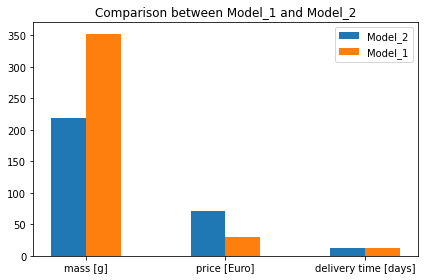

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Values for model_1
values_model_1 = [model_1.properties["mass [g]"],model_1.properties["price [Euro]"],model_1.properties["delivery time [days]"]]
# Values for model_2
values_model_2 = [model_2.properties["mass [g]"],model_2.properties["price [Euro]"],model_2.properties["delivery time [days]"]]



# Generate an array of indices for the number of values
x = np.arange(len(values_model_1))

# Width of the bars
bar_width = 0.25

# Plotting the bars for System 1
plt.bar(x, values_model_2, width=bar_width, label='Model_2')

# Shifting the x values for the bars of System 2
plt.bar(x + bar_width, values_model_1, width=bar_width, label='Model_1')

# Labeling the bars
plt.xlabel('')
plt.ylabel('')
plt.title('Comparison between Model_1 and Model_2')
plt.xticks(x + bar_width / 2, ['mass [g]', 'price [Euro]', 'delivery time [days]'])
plt.legend()

plt.tight_layout()


plt.tight_layout()
plt.savefig('comparison.svg', format='svg')
plt.show()

Interpretieren Sie Ihre Ergebnisse. Vergleichen Sie die KPIs Ihrer Autos. Konnten Sie Ihre gewünschte Verbesserung erzielen? Welche Schlüsse ziehen Sie aus den Ergebnissen für die Qualität der beiden
Fahrzeuge?

#### Ja, ich konnte die gewünschte Verbesserung erreichen, aber ich hätte nicht erwartet, dass das leichtere
#### Fahrzeug mehr kosten wird !

Diskutieren Sie, inwieweit Ihre entwickelten KPIs die im Skript erläuterten FAIR-Prinzipien erfüllen:

#### Es gibt eine vorgegebene Nameskonvention also ist meine Datei FINDABLE
#### Meine Datei wird in einem weit verbreiteten Format gespeichert und ist daher ACCESSABLE
#### Die Datei ist in Python, sie kann also auch außerhalb des Jupyter-Notebooks bearbeitet werden, INTEROPERABLE
#### Die Datei verfügt über ein Schema, das bei Bedarf auch geändert werden kann, daher also REUSEABLE

## Fazit

Ziehen Sie ein persönliches Fazit. Was haben Sie Neues gelernt?

#### Ich habe gelernt, Experimente durch Code durchzuführen, was vor allem kostengünstig ist
#### In unserem Fall wären die Lego-Teile sehr teuer

#### Dank der FAIR-Prinzipien wird die Datei zukunftssicher gespeichert und kann bei Bedarf später problemlos weiterverwendet oder  bearbeitet werden
